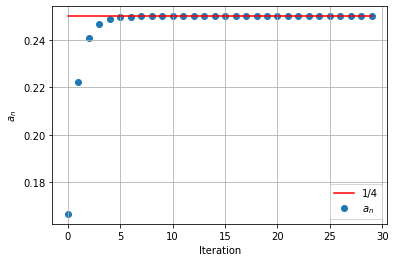

In [1]:
# The difference equation in n=3 case

import numpy as np
from numpy import zeros
import matplotlib.pyplot as plt
%matplotlib inline

n = 30             # number of iterations
a = zeros(n)       # initialise a zero list

a[0] = 1/6

for i in range (1, n):
    a[i] = (1/3) * a[i-1] + 1/6

plt.scatter(range(0,n),a, label='$a_n$')
plt.plot(range(0,n), [0.25]*n ,'r', label='1/4')
plt.grid('on')
plt.xlabel('Iteration')
plt.ylabel('$a_n$')
plt.legend()
plt.show()

In [ ]:
# The Pub Game with No Strategy — Bot VS Bot

import numpy as np
import random

rng = np.random.default_rng()
n = 6                 # number of glasses
glass = [0]*n         # all glasses empty at the beginning
water_initial = 0.5

# Check if there is an overflowing glass
def check_overflow(glass):
    return any(vol > 1 for vol in glass)


def game(turn):
    
    # Ali's turn
    if turn == 0:
        
        water_remaining = water_initial          # 0.5 pints of water to be added each turn
        for i in range(n):
            water_add = random.uniform(0, water_remaining)       # a random amount of water to be added to each glass
            glass[i] += water_add
            water_remaining -= water_add
        
        print(glass)
        
        if check_overflow(glass) == True:        # if there's an overflowing glass, Ali wins and the game ends
            print('Ali wins!')
            return 0
        
        game(1)
    
    # Beth's turn
    if turn == 1:
        
        glass_empty_index_1 = rng.integers(0, n)                # select the first random glass
        if glass_empty_index_1 == n-1:                          # and its adjacent glass
            glass_empty_index_2 = 0
        else:
            glass_empty_index_2 = glass_empty_index_1 + 1
        
        glass[glass_empty_index_1] = 0                          # empty them both
        glass[glass_empty_index_2] = 0
        
        print('Beth empties', glass_empty_index_1 + 1, 'and', glass_empty_index_2 + 1)    # '+1' after the indices is because the list index starts from 0
        
        game(0)
        
game(0)

In [ ]:
# The Pub Game with Input Check and Strategy — Me (Ali) VS Bot (Beth)

import numpy as np
import random
import fractions
from fractions import Fraction        # allow to input fractions

n = 6
glass = [0]*n 
water_initial = 0.5        # can be changed to any fraction — Extend

def check_overflow(glass):
    return any(vol > 1 for vol in glass)

# Input check
def check_input(water_add, water_remaining):
    while True:
        if not (0 <= water_add <= water_remaining):
            print('No. Choose again')
            water_add = float(input('The amount of water?'))
        else:
            return water_add
        
        
# Beth's strategy: empty the fullest glasses        
def empty(glass):
    
    sub_glass = glass.copy()
    sub_glass.remove(max(glass))
    
    glass_empty_index_1 = glass.index(max(glass))
    glass_empty_index_2 = glass.index(max(sub_glass))
    
    while True:
        if not (abs(glass_empty_index_1 - glass_empty_index_2) == 1 or abs(glass_empty_index_1 - glass_empty_index_2) == n-1):
            if glass_empty_index_1 != 0 and glass_empty_index_1 != n-1:
                left = glass_empty_index_1 - 1
                right = glass_empty_index_1 + 1
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
            elif glass_empty_index_1 == 0:
                left = n-1
                right = 1
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
            elif glass_empty_index_1 == n-1:
                left = n-2
                right = 0
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
        
        else: 
            return glass_empty_index_1, glass_empty_index_2
        
        
def game(turn):
    
    # My turn
    if turn == 0:
        
        index_list = []
        num = int(input('Your turn: How many glasses do you wish to fill?'))
        
        water_remaining = water_initial
        for i in range(num):
            glass_add_index, water_add = int(input('Which glass?')) - 1, float(Fraction(input('The amount of water?')))
            
            # input check
            water_add = check_input(water_add, water_remaining)
            
            glass[glass_add_index] += water_add
            water_remaining -= water_add
                            
        print(glass)

        if check_overflow(glass) == True:
            print('You won!')
            return 0
        
        game(1)
    
    # Beth's turn
    if turn == 1:
        
        glass_empty_index_1, glass_empty_index_2 = empty(glass)
        
        glass[glass_empty_index_1] = 0
        glass[glass_empty_index_2] = 0
        
        print('Beth empties', glass_empty_index_1 + 1, 'and', glass_empty_index_2 + 1)
        
        game(0)
        
game(0)

In [ ]:
# The Pub Game when n = 4 — Beth's strategy

import numpy as np
import random
import fractions
from fractions import Fraction

n = 4
glass = [0]*n 
water_initial = 0.5

def check_overflow(glass):
    return any(vol > 1 for vol in glass)

def check_input(water_add, water_remaining):
    while True:
        if not (0 <= water_add <= water_remaining):
            print('No. Choose again')
            water_add = float(input('The amount of water?'))
        else:
            return water_add
             
def empty(glass):
    
    sub_glass = glass.copy()
    sub_glass.remove(max(glass))
    
    glass_empty_index_1 = glass.index(max(glass))
    glass_empty_index_2 = glass.index(max(sub_glass))
    
    while True:
        if not (abs(glass_empty_index_1 - glass_empty_index_2) == 1 or abs(glass_empty_index_1 - glass_empty_index_2) == n-1):
            if glass_empty_index_1 != 0 and glass_empty_index_1 != n-1:
                left = glass_empty_index_1 - 1
                right = glass_empty_index_1 + 1
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
            elif glass_empty_index_1 == 0:
                left = n-1
                right = 1
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
            elif glass_empty_index_1 == n-1:
                left = n-2
                right = 0
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
        
        else: 
            return glass_empty_index_1, glass_empty_index_2

# A simpler way to check if Ali can ever win — assume Beth wins if Ali hasn't won after 100 turns.
def check_bethwins(turn_index):
    return (turn_index == 100)

turn_index = 0
def game(turn):
    global turn_index
    
    # Ali's turn
    if turn == 0:
        
        water_remaining = water_initial 
        for i in range(n):
            water_add = random.uniform(0, water_remaining)
            glass[i] += water_add
            water_remaining -= water_add
        
        print(glass)
        
        if check_overflow(glass) == True:
            print('Ali wins!')
            return 0
        
        turn_index += 1
        print(turn_index)
        game(1)
    
    # Beth's turn
    if turn == 1:
        
        if turn_index % 2 == 1 and max(glass) < 0.5:
            glass_empty_index_1, glass_empty_index_2 = 0, 1
        elif turn_index % 2 == 0 and max(glass) < 0.5:
            glass_empty_index_1, glass_empty_index_2 = 2, 3
        elif max(glass) >= 0.5:
            glass_empty_index_1, glass_empty_index_2 = empty(glass)
        
        glass[glass_empty_index_1] = 0
        glass[glass_empty_index_2] = 0
        
        print('Beth empties', glass_empty_index_1 + 1, 'and', glass_empty_index_2 + 1)
        
        if check_bethwins(turn_index) == True:
            print('Beth wins!')
            return 0
        
        game(0)
        
#game(0)

Comments: if run the game above without the $\texttt{check_bethwins}$ function, we can see that the game will go on forever — Ali will never win — which justifies Beth's winning strategy we developed.

Below, I plotted the probability distribution after running $10^4$ games. We can see that beth always wins.

In [2]:
# The Pub Game when n = 4 — Beth's strategy  (another set of code without printing anything for the sake of plotting)

import numpy as np
import random
import fractions
from fractions import Fraction
import matplotlib.pyplot as plt

n = 4
glass = [0]*n 
water_initial = 0.5

game_list = []

def check_overflow(glass):
    return any(vol > 1 for vol in glass)
             
def empty(glass):
    
    sub_glass = glass.copy()
    sub_glass.remove(max(glass))
    
    glass_empty_index_1 = glass.index(max(glass))
    glass_empty_index_2 = glass.index(max(sub_glass))
    
    while True:
        if not (abs(glass_empty_index_1 - glass_empty_index_2) == 1 or abs(glass_empty_index_1 - glass_empty_index_2) == n-1):
            if glass_empty_index_1 != 0 and glass_empty_index_1 != n-1:
                left = glass_empty_index_1 - 1
                right = glass_empty_index_1 + 1
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
            elif glass_empty_index_1 == 0:
                left = n-1
                right = 1
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
            elif glass_empty_index_1 == n-1:
                left = n-2
                right = 0
                glass_empty_index_2 = glass.index(max([glass[left], glass[right]]))
        
        else: 
            return glass_empty_index_1, glass_empty_index_2

def check_bethwins(turn_index):
    return (turn_index == 100)

turn_index = 0
def game(turn):
    global turn_index
    
    # Ali's turn
    if turn == 0:
        
        water_remaining = water_initial 
        for i in range(n):
            water_add = random.uniform(0, water_remaining)
            glass[i] += water_add
            water_remaining -= water_add
        
        if check_overflow(glass) == True:
            game_list.append('Ali wins')
            return 0
        
        turn_index += 1
        game(1)
    
    # Beth's turn
    if turn == 1:
        
        if turn_index % 2 == 1 and max(glass) < 0.5:
            glass_empty_index_1, glass_empty_index_2 = 0, 1
        elif turn_index % 2 == 0 and max(glass) < 0.5:
            glass_empty_index_1, glass_empty_index_2 = 2, 3
        elif max(glass) >= 0.5:
            glass_empty_index_1, glass_empty_index_2 = empty(glass)
        
        glass[glass_empty_index_1] = 0
        glass[glass_empty_index_2] = 0
        
        
        if check_bethwins(turn_index) == True:
            game_list.append('Beth wins') 
            return 0
        
        game(0)

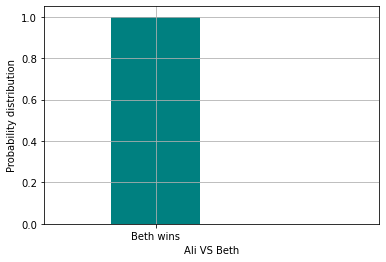

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

sample = int(1e4)
    
for i in range(sample):
    game(0)
    turn_index = 0
    
bins = np.arange(0, 2)-0.5
fig, ax = plt.subplots(1,1)
Data, _, _=ax.hist(game_list, bins, color='teal', density=True, rwidth=0.8)
ax.set_xlabel('Ali VS Beth')
ax.set_ylabel('Probability distribution')
ax.set_xlim(-1, 2)
plt.grid('on')
plt.show()